In [15]:
setwd('/import/liujing/data/')

In [16]:
data1 = read.table('./train.txt',header =T,sep = '\t',check.names =  F)

In [17]:
head(data1,2)

,Gene_name,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,...,H42,H43,H44,H45,H46,H4,H5,H7,H8,H9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PCDHGA7,0.4695917,0.0650995,0.5719537,0.2243807,0.2778357,0.3244079,0.3385146,0.3741117,0.2707183,...,0.1563046,0.1786892,0.1263336,0.07888511,0.2894804,0.4040563,0.1882475,0.1843685,0.927869,0.4618961
2,PCDHGA6,0.9626630,0.3719971,0.9496590,0.4605710,0.7203147,0.3244079,0.6073351,0.5391610,0.3970535,...,0.2709279,0.5360676,0.2411824,0.27046323,0.5010238,0.4914198,0.4823842,0.6913819,1.293789,0.7743553


In [18]:
colnames(data1) = paste0(colnames(data1),'_M1')

In [19]:
data2 = read.table('../test.txt',header =T,sep = '\t',check.names =  F)

In [20]:
colnames(data2) = paste0(colnames(data2),'_M2')

In [21]:
head(data2,2)

,Gene_name_M2,CI10_M2,CI11_M2,CI12_M2,CI13_M2,CI14_M2,CI15_M2,CI16_M2,CI1_M2,CI2_M2,...,H18_M2,H1_M2,H2_M2,H3_M2,H4_M2,H5_M2,H6_M2,H7_M2,H8_M2,H9_M2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RNA5SP111,0,0,0.6257938,0,0,0,0,0,0,...,0,0,0,1.409555,0,0,1.985912,0.7690921,0,0
2,RNA5SP110,0,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.0000000,0,0


In [22]:
library(dplyr)

In [23]:
data = merge(data1,data2,by.x = 'Gene_name_M1',by.y = 'Gene_name_M2') %>% na.omit()

In [24]:
data = data[!duplicated(data$Gene_name_M1),]

In [25]:
rownames(data) = data[,1]
data = data[,-1]

In [26]:
head(data,6)

,CI10_M1,CI11_M1,CI12_M1,CI13_M1,CI14_M1,CI15_M1,CI16_M1,CI17_M1,CI18_M1,CI19_M1,...,H18_M2,H1_M2,H2_M2,H3_M2,H4_M2,H5_M2,H6_M2,H7_M2,H8_M2,H9_M2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Dec,0.03458845,0.00000000,0.00000000,0.01159795,0.00000000,0.00000000,0.0000000,0.00000000,0.008862286,0.00000000,...,0.00000000,0.01865850,0.00000000,0.0000000,0.0000000,0.03354671,0.0285174,0.01656607,0.00000000,0.00000000
1-Mar,6.37533353,14.47554602,12.77841579,23.51504755,18.84066832,6.02394345,11.4220271,10.56790701,50.336592430,11.31830013,...,12.24103728,9.83115570,21.52281860,17.0835337,11.1726732,9.84920741,15.5839781,11.82206945,9.10757169,17.71799150
1-Sep,2.30759170,1.48271780,3.93602183,2.06337406,3.01151520,3.31882170,3.7835877,3.53261063,1.350028619,2.53257411,...,5.55640659,3.34025290,3.92486348,4.1524549,4.6309053,4.04721523,4.7881037,7.33126960,5.08153666,4.92355698
10-Mar,0.01098816,0.06963605,0.06060393,0.02210683,0.04815693,0.04794283,0.1211453,0.07209165,0.016892382,0.01871297,...,0.01266615,0.03556493,0.04312891,0.1157439,0.1368694,0.04795748,0.0000000,0.07894136,0.04633463,0.01674622
10-Sep,1.18203240,0.87463348,0.46566882,0.53572679,1.04746524,1.05792157,0.6940115,0.75481697,0.748833382,0.63044987,...,0.46416180,0.27327402,1.01967430,0.6499126,0.4530305,0.47243069,0.4658608,0.57857457,0.51121726,0.43551451
11-Mar,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.000000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000


In [27]:
anno = data.frame(sample = colnames(data),
          group = c(rep('CI',43),rep('H',42),rep('CI',16),rep('H',18)),
          Matrix = c(rep('Matrix1',85),rep('Matrix2',34) ) )

In [28]:
rownames(anno) = anno[,1]
anno = anno[,-1]

In [29]:
head(anno,2)

,group,Matrix
,<chr>,<chr>
CI10_M1,CI,Matrix1
CI11_M1,CI,Matrix1


In [30]:
exp = log(data+1)

cg=names(tail(sort(apply(exp,1,sd)),5000))
n=exp[cg,]

library(pheatmap)

forplot = na.omit(n)
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 5000  119

In [31]:
library(pheatmap)

In [32]:
data

,CI10_M1,CI11_M1,CI12_M1,CI13_M1,CI14_M1,CI15_M1,CI16_M1,CI17_M1,CI18_M1,CI19_M1,...,H18_M2,H1_M2,H2_M2,H3_M2,H4_M2,H5_M2,H6_M2,H7_M2,H8_M2,H9_M2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Dec,0.03458845,0.000000000,0.00000000,0.01159795,0.00000000,0.00000000,0.00000000,0.000000000,0.008862286,0.000000000,...,0.00000000,0.01865850,0.00000000,0.0000000,0.00000000,0.03354671,0.0285174,0.01656607,0.00000000,0.00000000
1-Mar,6.37533353,14.475546020,12.77841579,23.51504755,18.84066832,6.02394345,11.42202709,10.567907010,50.336592430,11.318300130,...,12.24103728,9.83115570,21.52281860,17.0835337,11.17267322,9.84920741,15.5839781,11.82206945,9.10757169,17.71799150
1-Sep,2.30759170,1.482717800,3.93602183,2.06337406,3.01151520,3.31882170,3.78358773,3.532610632,1.350028619,2.532574109,...,5.55640659,3.34025290,3.92486348,4.1524549,4.63090526,4.04721523,4.7881037,7.33126960,5.08153666,4.92355698
10-Mar,0.01098816,0.069636050,0.06060393,0.02210683,0.04815693,0.04794283,0.12114526,0.072091652,0.016892382,0.018712968,...,0.01266615,0.03556493,0.04312891,0.1157439,0.13686941,0.04795748,0.0000000,0.07894136,0.04633463,0.01674622
10-Sep,1.18203240,0.874633477,0.46566882,0.53572679,1.04746524,1.05792157,0.69401146,0.754816971,0.748833382,0.630449869,...,0.46416180,0.27327402,1.01967430,0.6499126,0.45303051,0.47243069,0.4658608,0.57857457,0.51121726,0.43551451
11-Mar,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000,...,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000
11-Sep,6.58440794,3.986373940,5.15384183,3.47289788,4.72072709,10.76521556,4.09908223,5.223885151,2.959437678,4.087407776,...,4.46989476,4.05847934,4.68314621,5.3312347,5.44937999,5.14316613,5.1030665,8.04006530,5.06229633,6.22965735
12-Sep,0.05148738,0.000000000,0.04732878,0.00000000,0.00000000,0.00000000,0.02183277,0.000000000,0.000000000,0.000000000,...,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.03745250,0.0000000,0.00000000,0.00000000,0.00000000
14-Sep,0.00000000,0.000000000,0.00000000,0.00000000,0.02426961,0.00000000,0.03522317,0.012975706,0.000000000,0.000000000,...,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000


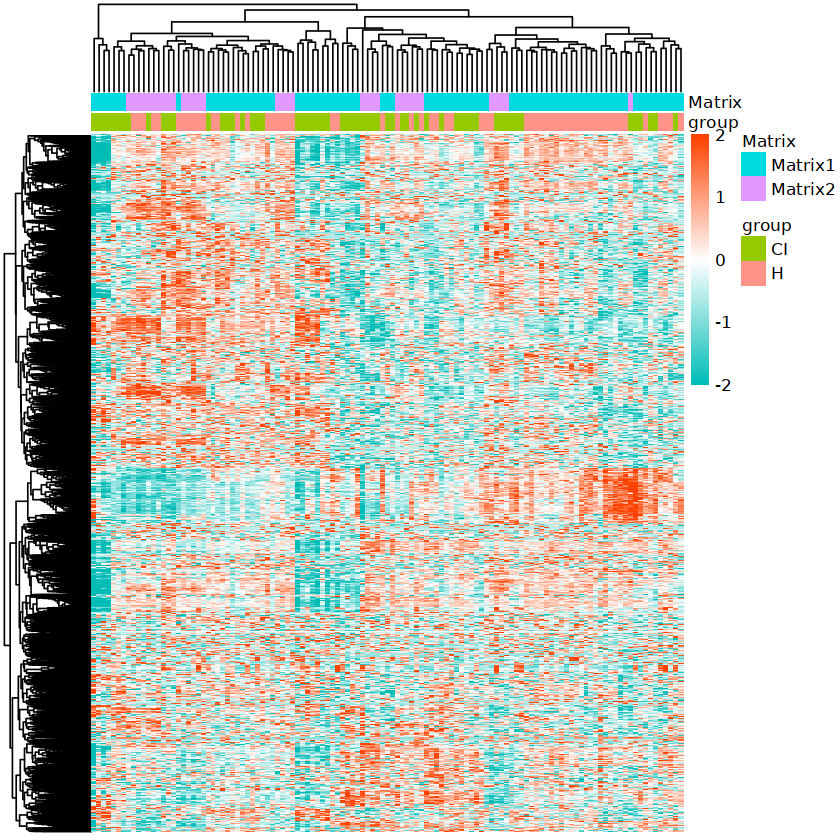

In [33]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
         annotation_col = anno,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

Warning message:
"package 'FactoMineR' was built under R version 4.2.3"
Warning message:
"package 'factoextra' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



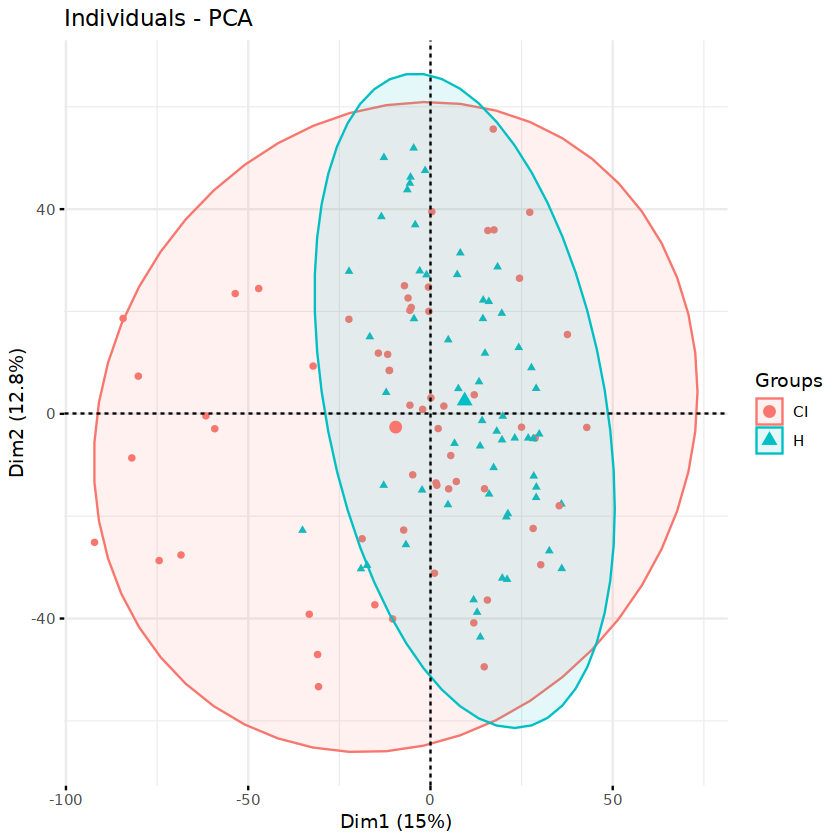

In [34]:
library("FactoMineR")
library("factoextra")
pca.plot = function(dat,col){
  
  df.pca <- PCA(t(dat), graph = FALSE)
  fviz_pca_ind(df.pca,
               geom.ind = "point",
               col.ind = col ,
               addEllipses = TRUE,
               legend.title = "Groups"
  )
}
pca.plot(dat,factor(anno$group))

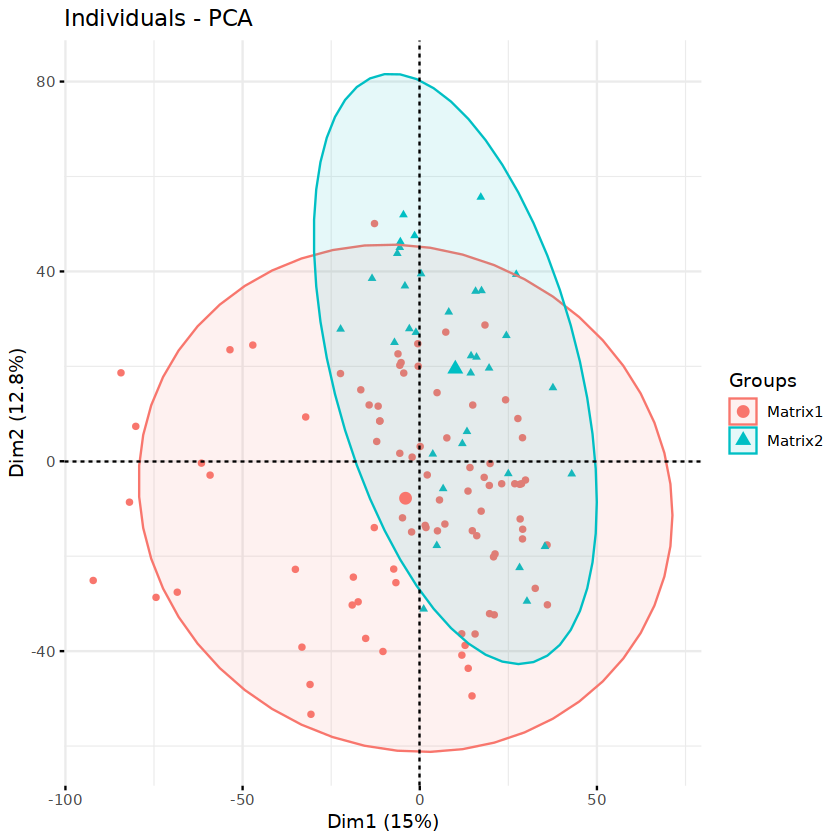

In [35]:
pca.plot(dat,factor(anno$Matrix))

### 去批次

In [132]:
library(sva)

In [133]:
batch = anno$Matrix

In [134]:

group_list =  c(rep('CI',43),rep('H',42),rep('CI',16),rep('H',18))

In [135]:
mod = model.matrix(~as.factor(group_list))

In [136]:
combat_edata1 = ComBat(dat=data, batch=batch,  par.prior=TRUE,  prior.plots=FALSE,mod = mod) 

save(combat_edata1,anno,file = 'combat_edata1.rda')

Found 1621 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




### method2  limma removeBatchEffect 

In [ ]:
# library(limma)

# expr <- removeBatchEffect(data, anno$Matrix)
# combat_edata1 = expr

In [137]:
exp = combat_edata1

cg=names(tail(sort(apply(exp,1,sd)),5000))
n=exp[cg,]

library(pheatmap)

forplot = na.omit(n)
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 5000  119

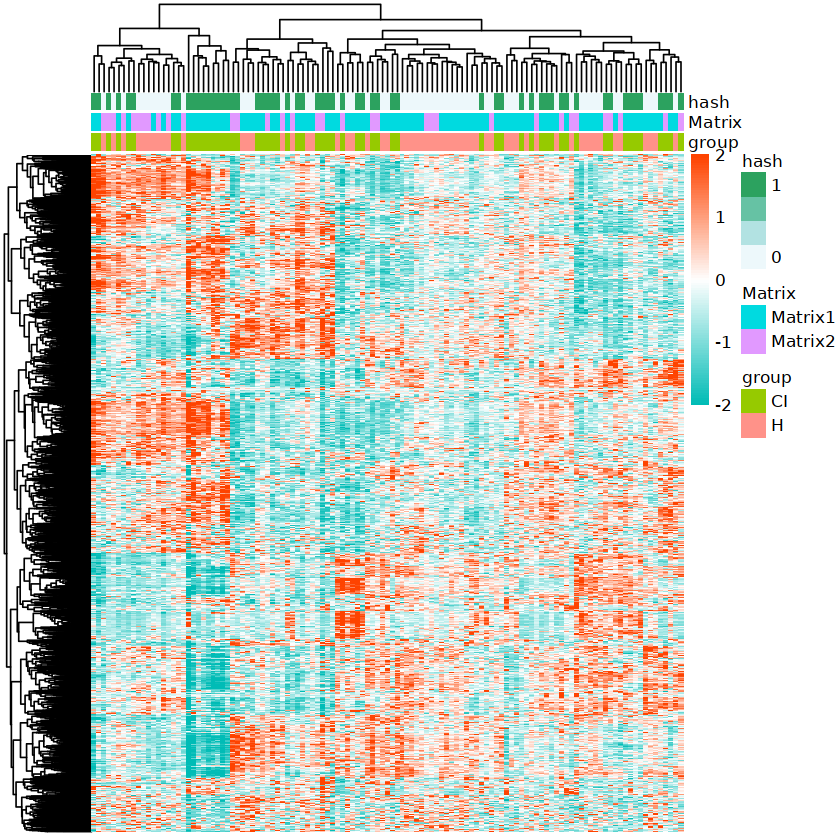

In [138]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
         annotation_col = anno,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

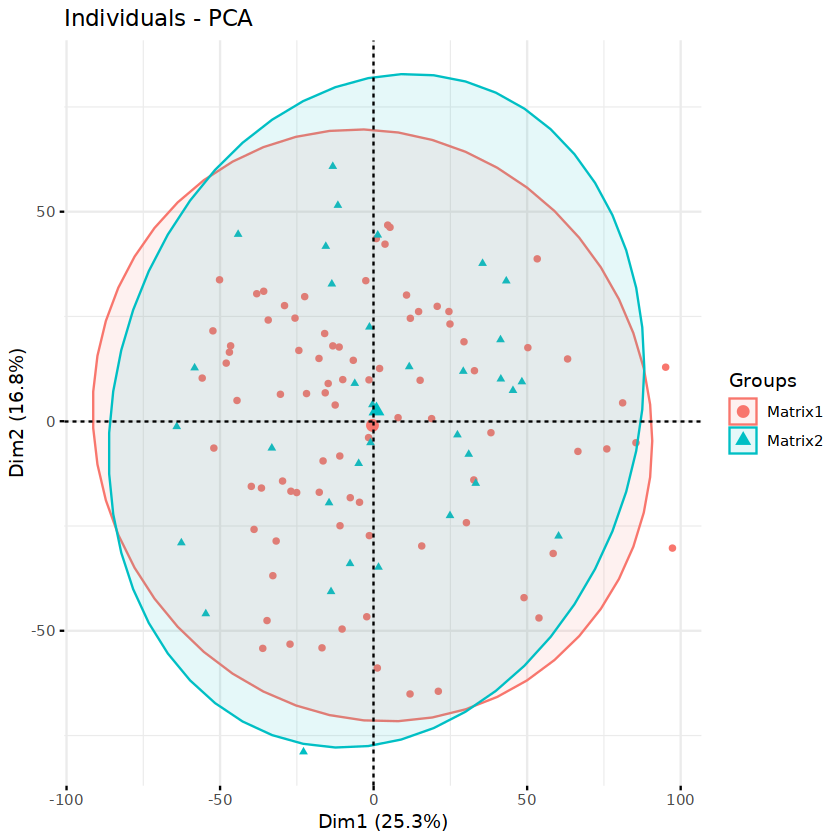

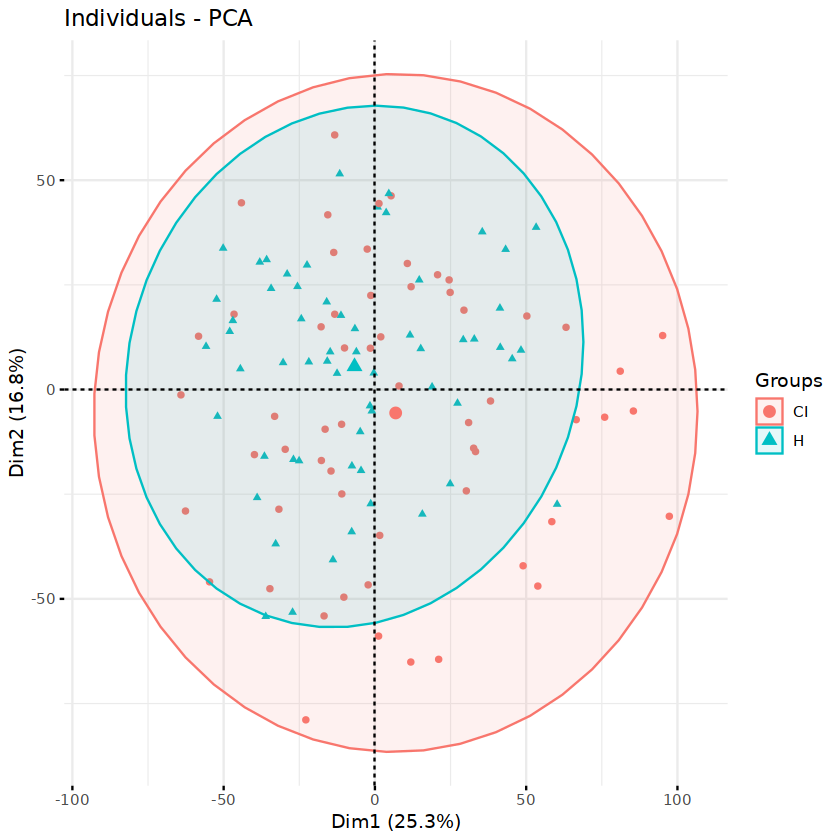

In [139]:
library("FactoMineR")
library("factoextra")
pca.plot = function(dat,col){
  
  df.pca <- PCA(t(dat), graph = FALSE)
  fviz_pca_ind(df.pca,
               geom.ind = "point",
               col.ind = col ,
               addEllipses = TRUE,
               legend.title = "Groups"
  )
}
pca.plot(dat,factor(anno$Matrix))

pca.plot(dat,factor(anno$group))

In [61]:
diff = read.table('./gene16.txt',header =F,sep = '\t',check.names =  F)

In [62]:
colnames(diff) = 'genename'

In [63]:
.libPaths(c('/root/miniconda3/envs/metadoc/lib/R/library','/root/miniconda3/envs/Rdoc/lib/R/library'))

In [140]:
library(HGNChelper)
# expression_matrix_file是一个行为基因，列为样本的基因表达矩阵
mtx <- as.data.frame(combat_edata1)
dim(mtx)
# check gene symtol
t <- checkGeneSymbols(rownames(mtx))
table(t$Approved)
table(is.na(t$Suggested.Symbol))

# delete <NA> and duplicated Suggested.Symbol
mtx$Suggested.Symbol <- t$Suggested.Symbol
mtx <- mtx[!is.na(mtx$Suggested.Symbol), ]
mtx <- mtx[!duplicated(mtx$Suggested.Symbol), ]
# delete multiple Suggested.Symbol
mtx <- mtx[!grepl("///", mtx$Suggested.Symbol), ]

# reset rownames
rownames(mtx) <- mtx$Suggested.Symbol
# delete Suggested.Symbol columns
mtx <- subset(mtx, select = -c(Suggested.Symbol))
dim(mtx)

[1] 28056   119

Maps last updated on: Fri May 17 15:09:37 2024

Warning message in checkGeneSymbols(rownames(mtx)):
"Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected."
Warning message in checkGeneSymbols(rownames(mtx)):
"x contains non-approved gene symbols"



FALSE  TRUE 
 6352 21704 


FALSE  TRUE 
23332  4724 

[1] 23241   119

In [141]:
expr = combat_edata1[diff$genename,] %>% t() %>%  as.data.frame()

In [66]:
#expr = mtx[diff$genename,] %>% t() %>%  as.data.frame()

In [67]:
grep('MAR',rownames(mtx),value = T)

[1] "MARCHF10"   "MARCHF11"   "MARCHF3"    "MARCHF4"    "MARCHF5"   
 [6] "MARCHF6"    "MARCHF7"    "MARCHF8"    "MARCHF9"    "ERMARD"    
[11] "MARF1"      "MARCKS"     "MARCKSL1"   "MARCKSL1P1" "MARCKSL1P2"
[16] "MARCO"      "MARK1"      "MARK2"      "MARK2P13"   "MARK2P6"   
[21] "MARK2P9"    "MARK3"      "MARK4"      "MARS1"      "MARS2"     
[26] "MARVELD1"   "MARVELD2"   "MARVELD3"   "SETMAR"     "SIGMAR1"   
[31] "SMARCA1"    "SMARCA2"    "SMARCA4"    "SMARCA5"    "SMARCAD1"  
[36] "SMARCAL1"   "SMARCB1"    "SMARCC1"    "SMARCC2"    "SMARCD1"   
[41] "SMARCD2"    "SMARCD3"    "SMARCE1"    "SMARCE1P1"  "SMARCE1P5" 
[46] "SMARCE1P6"

In [68]:
library(dplyr)

In [69]:
Type =  c(rep(1,43),rep(0,42),rep(1,16),rep(0,18))

In [70]:
save(expr,Type,file = 'expr.rda')

In [71]:
data1 = data %>% tibble::rownames_to_column(.,'GENE')

In [142]:
save(mtx,Type,file = 'merged.rda')